In [1]:
import cv2
import numpy as np 
import skimage.exposure
import matplotlib.pyplot as plt

True

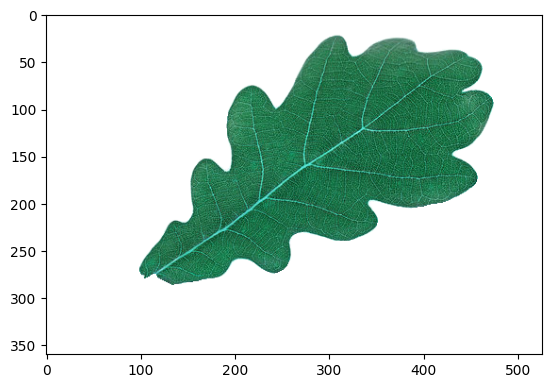

In [6]:
img = cv2.imread(r"C:\Users\ASUS\Downloads\quercus.jpg")
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
# threshold using inRange
range1 = (36,0,0)
range2 = (86,255,255)
mask = cv2.inRange(hsv,range1,range2)

res = cv2.bitwise_and(img, img, mask=mask)

# antialias mask
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)
mask = skimage.exposure.rescale_intensity(mask, in_range=(127.5,255), out_range=(0,255))

result = img.copy()
result[mask==0] = (255,255,255)
plt.imshow(result)

# write result to disk
cv2.imwrite("mask2.png", mask)
cv2.imwrite("acersmall_bg2white.jpg", result)